<a href="https://colab.research.google.com/github/AbigailRM/automatic-learn/blob/main/CasoAprendizajeAutomatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Metros_Cuadrados  Num_Habitaciones  Antiguedad (años) Precio (USD)
0                50                 1                 10      100,000
1                70                 2                  5      150,000
2               100                 3                 20      200,000
3               120                 4                 15      250,000
4                90                 3                  8      180,000


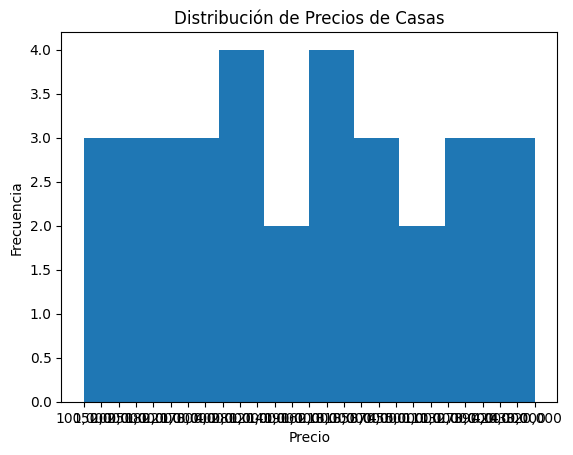

0    100000.0
1    150000.0
2    200000.0
3    250000.0
4    180000.0
Name: Precio (USD), dtype: float64
Error Cuadrático Medio (MSE): 316824636.17362744
Coeficiente de Determinación (R2): 0.9133306466394332


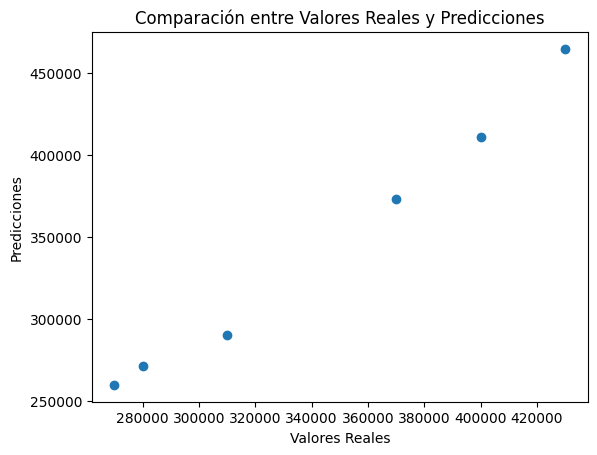

In [ ]:
import pandas as pd  # Para manipular datos en forma de tablas
import numpy as np  # Para realizar operaciones matemáticas y trabajar con arrays
import matplotlib.pyplot as plt  # Para generar gráficas y visualizaciones
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.linear_model import LinearRegression  # Para crear el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score #Para medir el rendimiento del modelo
from google.colab import drive #Permite acceder a archivos de Drive
drive.mount('/content/drive')


# Subimos el archivo CSV desde nuestra computadora
#from google.colab import files
#uploaded = files.upload()  # Abre un cuadro de diálogo para seleccionar el archivo

# Esto convierte los datos del archivo CSV en una estructura tabular fácil de manipular
data = pd.read_csv('/content/drive/My Drive/Maestria big data/Asignaturas/Ciclo 3/Aprendizaje automatico/datos-prueba-casas.csv', delimiter=';')
print(data.head())  # Verifica los datos cargados

data.describe() #Esto ayuda a detectar posibles problemas como valores atípicos o nulos

#Construímos un histograma para conocer la distribución de los datos
plt.hist(data['Precio (USD)'], bins=10)  # Creamos un histograma con 10 intervalos
plt.xlabel('Precio')  # Etiqueta para el eje x
plt.ylabel('Frecuencia')  # Etiqueta para el eje y
plt.title('Distribución de Precios de Casas')  # Título de la gráfica
plt.show()  # Mostramos la gráfica

# Seleccionamos las columnas que serán nuestras variables independientes (X) y dependiente (y)
# X incluye las características que usaremos para predecir
# y es la variable objetivo, el precio de las casas
X = data[['Metros_Cuadrados', 'Num_Habitaciones', 'Antiguedad (años)']]
y = data['Precio (USD)']

# Dividimos los datos en conjuntos de entrenamiento (80%) y prueba (20%)
# Esto nos permite entrenar el modelo y luego evaluarlo en datos que no ha visto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos una instancia del modelo de regresión lineal
# Este modelo intenta ajustar una línea (o hiperplano) que reduzca el error entre las predicciones y los valores reales
model = LinearRegression()

data['Precio (USD)'] = data['Precio (USD)'].str.replace(',', '').astype(float) # Elimina las comas y convierte a float
print(data['Precio (USD)'].head())  # Verifica los datos cargados

X = data[['Metros_Cuadrados', 'Num_Habitaciones', 'Antiguedad (años)']]
y = data['Precio (USD)']

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Hacemos predicciones sobre el conjunto de prueba para evaluar el modelo
y_pred = model.predict(X_test)

# Calculamos el error cuadrático medio, para saber la diferencia media entre los valores reales y las predicciones
mse = mean_squared_error(y_test, y_pred)

# Calculamos el coeficiente de determinación (R2), que mide qué tan bien el modelo explica la variabilidad de los datos
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R2): {r2}')

# Comparamos los valores reales con las predicciones utilizando un diagrama de dispersión
# Esto nos permite ver qué tan cerca están las predicciones de los valores reales
plt.scatter(y_test, y_pred)  # Cada punto representa un precio real y su predicción correspondiente
plt.xlabel('Valores Reales')  # Etiqueta para el eje x
plt.ylabel('Predicciones')  # Etiqueta para el eje y
plt.title('Comparación entre Valores Reales y Predicciones')  # Título de la gráfica
plt.show()
